# Prospective analysis of INE mobility dataset for public parking services

In [64]:
import pandas as pd
import numpy as np

import os
import datetime
from datetime import date, timedelta
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
%matplotlib inline

data_path = os.path.join('/','home','fterroso','data','Spain-INE-mobility-study-2020','muestra1')

In [26]:
target_regions_ids= ['3003001','3003002','3003003']

In [27]:
e_date = datetime.datetime.strptime('2020-10-15', '%Y-%m-%d')
i_date = datetime.datetime.strptime('2020-09-01', '%Y-%m-%d')

In [28]:
def generate_days_fn(init_date, final_date):
    
    delta = final_date - init_date       # as timedelta

    target_days = []
    for i in range(delta.days + 1):
        day = init_date + timedelta(days=i)
        target_days.append(day)
    
    return target_days

In [29]:
def read_INE_trips_date_fn(date_, trips_type='all', flow_type= 'all'):
    date_str= date_.strftime('%Y%m%d')
    df_date= pd.read_csv(os.path.join(data_path, f'{date_str}_maestra_1_mitma_distrito.txt'), 
                             sep='|',dtype={'origen':str, 'destino':str,'fecha':str, 'periodo':str})
    
    if flow_type== 'incoming':
        df_date = df_date[df_date['destino'].isin(target_regions_ids)]
    elif flow_type == 'outgoing':
        df_date = df_date[df_date['origen'].isin(target_regions_ids)]
    elif flow_type== 'all':
        df_date = df_date[(df_date['destino'].isin(target_regions_ids)) |
                          (df_date['origen'].isin(target_regions_ids))]
    
    if trips_type=='inter':
        df_date= df_date[df_date['origen']!=df_date['destino']] #only keep trips between areas
    elif trips_type=='intra':
        df_date= df_date[df_date['origen']==df_date['destino']] #only keep trips within the areas
    
    
    
    #convert period column to a two-digit string
    df_date['periodo'] = df_date['periodo'].apply(lambda x: x.zfill(2))
    df_date= df_date.fillna(0) # set nan as 0
    return df_date

## Incoming & outgoing inter-area trips

In [30]:
in_dfs = []
out_dfs = []
target_days = generate_days_fn(i_date, e_date)
for date in tqdm_notebook(target_days):
    in_df = read_INE_trips_date_fn(date, 'inter', 'incoming')
    in_dfs.append(in_df)
    
    out_df = read_INE_trips_date_fn(date, 'inter', 'outgoing')
    out_dfs.append(out_df)
    
inter_in_trips = pd.concat(in_dfs,axis=0)
inter_out_trips = pd.concat(out_dfs,axis=0)

In [31]:
inter_in_trips.head()

,fecha,origen,destino,actividad_origen,actividad_destino,residencia,edad,periodo,distancia,viajes,viajes_km
29137,20200901,0200301,3003001,otros,casa,30,0.0,18,100+,9.788,1261.216
29138,20200901,0200301,3003001,otros,otros,30,0.0,09,100+,9.788,1242.528
29139,20200901,0200301,3003001,otros,otros,30,0.0,10,100+,7.054,912.790
29140,20200901,0200301,3003002,otros,casa,30,0.0,19,100+,7.675,984.381
29141,20200901,0200301,3003002,otros,otros,30,0.0,12,100+,7.054,908.965


In [32]:
inter_in_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458212 entries, 29137 to 5343910
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fecha              458212 non-null  object 
 1   origen             458212 non-null  object 
 2   destino            458212 non-null  object 
 3   actividad_origen   458212 non-null  object 
 4   actividad_destino  458212 non-null  object 
 5   residencia         458212 non-null  int64  
 6   edad               458212 non-null  float64
 7   periodo            458212 non-null  object 
 8   distancia          458212 non-null  object 
 9   viajes             458212 non-null  float64
 10  viajes_km          458212 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 42.0+ MB


In [33]:
inter_out_trips.head()

,fecha,origen,destino,actividad_origen,actividad_destino,residencia,edad,periodo,distancia,viajes,viajes_km
3496965,20200901,3003001,0200301,casa,otros,30,0.0,13,100+,9.788,1261.216
3496966,20200901,3003001,0200301,otros,otros,30,0.0,09,100+,7.565,966.574
3496967,20200901,3003001,0200302,otros,otros,30,0.0,09,100+,9.788,1270.597
3496968,20200901,3003001,0200308,otros,otros,30,0.0,19,100+,5.663,724.829
3496969,20200901,3003001,02030_AM,otros,casa,2,0.0,12,050-100,22.844,2122.222


In [34]:
inter_out_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453815 entries, 3496965 to 3448956
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fecha              453815 non-null  object 
 1   origen             453815 non-null  object 
 2   destino            453815 non-null  object 
 3   actividad_origen   453815 non-null  object 
 4   actividad_destino  453815 non-null  object 
 5   residencia         453815 non-null  int64  
 6   edad               453815 non-null  float64
 7   periodo            453815 non-null  object 
 8   distancia          453815 non-null  object 
 9   viajes             453815 non-null  float64
 10  viajes_km          453815 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 41.5+ MB


## Intra area trips

In [35]:
dfs = []
target_days = generate_days_fn(i_date, e_date)
for date in tqdm_notebook(target_days):
    df = read_INE_trips_date_fn(date, 'intra', 'all')
    dfs.append(df)
    
intra_trips = pd.concat(dfs,axis=0)


In [36]:
intra_trips.head()

,fecha,origen,destino,actividad_origen,actividad_destino,residencia,edad,periodo,distancia,viajes,viajes_km
3498382,20200901,3003001,3003001,casa,otros,30,0.0,00,0005-002,277.95,256.904
3498383,20200901,3003001,3003001,casa,otros,30,0.0,00,002-005,16.35,38.883
3498384,20200901,3003001,3003001,casa,otros,30,0.0,01,0005-002,245.25,262.989
3498385,20200901,3003001,3003001,casa,otros,30,0.0,02,0005-002,130.80,126.229
3498386,20200901,3003001,3003001,casa,otros,30,0.0,02,002-005,16.35,47.837


In [37]:
intra_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37105 entries, 3498382 to 3447343
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fecha              37105 non-null  object 
 1   origen             37105 non-null  object 
 2   destino            37105 non-null  object 
 3   actividad_origen   37105 non-null  object 
 4   actividad_destino  37105 non-null  object 
 5   residencia         37105 non-null  int64  
 6   edad               37105 non-null  float64
 7   periodo            37105 non-null  object 
 8   distancia          37105 non-null  object 
 9   viajes             37105 non-null  float64
 10  viajes_km          37105 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 3.4+ MB


# Number of trips per date

In [48]:
inter_in_per_date = inter_in_trips.groupby('fecha').size()
inter_out_per_date = inter_out_trips.groupby('fecha').size()
intra_per_date = intra_trips.groupby('fecha').size()

In [69]:
inter_in_per_date.index

Index(['20200901', '20200902', '20200903', '20200904', '20200905', '20200906',
       '20200907', '20200908', '20200909', '20200910', '20200911', '20200912',
       '20200913', '20200914', '20200915', '20200916', '20200917', '20200918',
       '20200919', '20200920', '20200921', '20200922', '20200923', '20200924',
       '20200925', '20200926', '20200927', '20200928', '20200929', '20200930',
       '20201001', '20201002', '20201003', '20201004', '20201005', '20201006',
       '20201007', '20201008', '20201009', '20201010', '20201011', '20201012',
       '20201013', '20201014', '20201015'],
      dtype='object', name='fecha')

In [75]:
inter_in_per_date.shape

(45,)

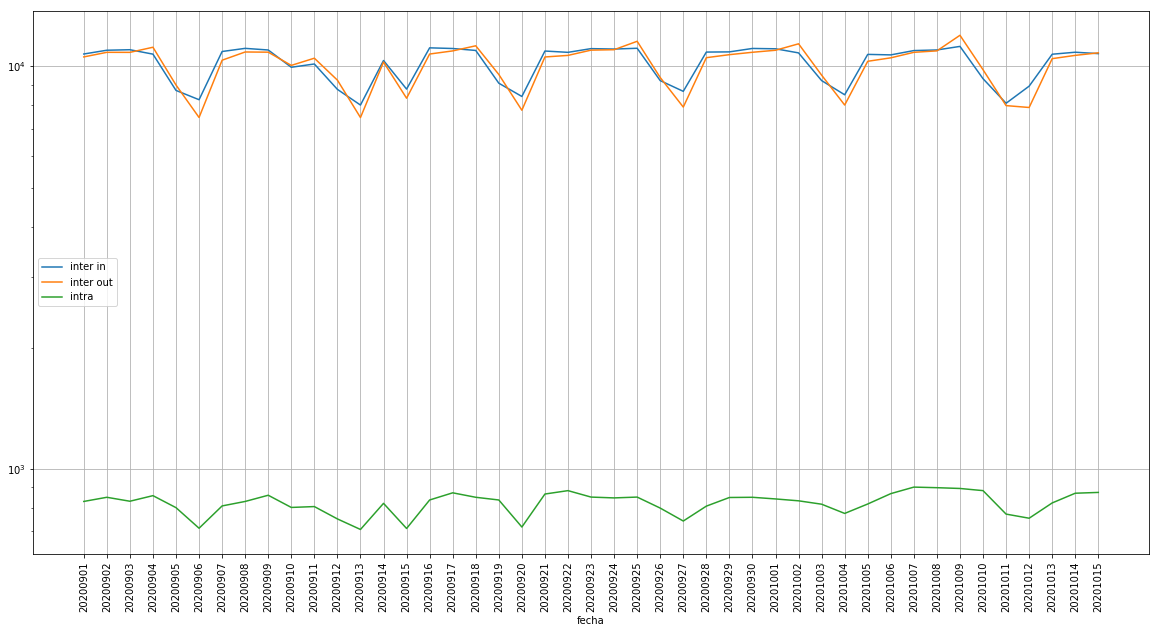

In [89]:
ax= inter_in_per_date.plot(figsize=(20,10), label='inter in', logy=True)
inter_out_per_date.plot(ax=ax, label='inter out')
intra_per_date.plot(ax=ax, label='intra',grid=True)
ax.legend(loc='center left');
plt.xticks(range(inter_in_per_date.shape[0]), inter_in_per_date.index.values, rotation='90');
